<a href="https://colab.research.google.com/github/shreyaa2506/DSA_Problems/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-01-29 10:50:55.188109


In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()


--2024-01-29 10:54:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 173.194.74.207, 173.194.192.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   246MB/s    in 0.4s    

2024-01-29 10:54:48 (246 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [4]:
!ls pizza_steak


test  train


In [6]:
!ls pizza_steak/train/

pizza  steak


In [7]:
!ls pizza_steak/train/pizza/

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [8]:
import os

In [10]:
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [16]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [17]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape} ")
  return img




Image shape: (512, 512, 3) 


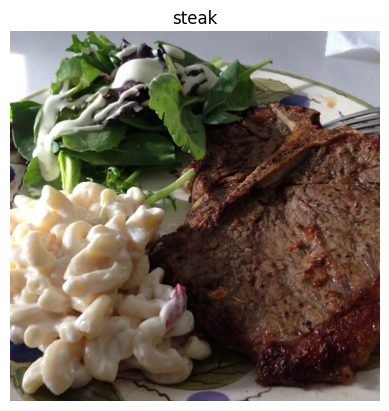

In [30]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")


In [32]:
img/255

array([[[0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.72156863],
        ...,
        [0.81568627, 0.85882353, 0.92941176],
        [0.82745098, 0.87058824, 0.94117647],
        [0.83529412, 0.87843137, 0.94901961]],

       [[0.65490196, 0.68235294, 0.71372549],
        [0.65098039, 0.67843137, 0.70980392],
        [0.65098039, 0.67843137, 0.71764706],
        ...,
        [0.8       , 0.84313725, 0.91372549],
        [0.81176471, 0.85490196, 0.9254902 ],
        [0.81960784, 0.8627451 , 0.93333333]],

       [[0.65882353, 0.68627451, 0.71764706],
        [0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.72156863],
        ...,
        [0.79215686, 0.83529412, 0.90588235],
        [0.80392157, 0.84705882, 0.91764706],
        [0.81176471, 0.85490196, 0.9254902 ]],

       ...,

       [[0.61568627, 0.59607843, 0.57254902],
        [0.62745098, 0.60784314, 0.58431373],
        [0.64313725, 0

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary" ,
                                               seed =42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary" ,
                                               seed =42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_Size = 3,
                           activation = "relu",
                           image_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,)
                      )
])
